In [1]:
import anjl
import plotly.io
import zarr
from scipy.spatial.distance import squareform
import pandas as pd
import numpy as np

plotly.io.renderers.default = "plotly_mimetype+notebook_connected"

## Example 1

In [2]:
D1, _ = anjl.data.example_1()
D1

array([[ 0.,  4.,  5., 10.],
       [ 4.,  0.,  7., 12.],
       [ 5.,  7.,  0.,  9.],
       [10., 12.,  9.,  0.]], dtype=float32)

In [3]:
Z1h = anjl.heuristic_nj(D1)
Z1h

init
parent 4 x 0 y 1 z 0
init done
z 0
J [18446744073709551615                    0                    0
                    2]

-------------------------------------------------------------------------------
iteration 1 z 0
begin search
z 0
J [18446744073709551615                    0                    0
                    2]
First search the rows up to the new node z=0.
Second, fully search the row corresponding to the new node z=0.
i=0
Third, search all other rows after z=0.
i=1
i=2
Search 2 0
Previous best match still available at row i=2, col j=0.
Compare new node at row i=2, col z=0
Found new global minimum at i=2, j=0, q_ij=-22.0, d_ij=4.0.
i=3
Search 3 2
Previous best match still available at row i=3, col j=2.
Compare new node at row i=3, col z=0

-------------------------------------------------------------------------------
iteration 2 z 2


array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [4]:
print(anjl.to_string(Z1h))

Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)


In [5]:
Z1 = anjl.canonical_nj(D1)
Z1

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [6]:
print(anjl.to_string(Z1))

Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)


In [7]:
Z1r = anjl.rapid_nj(D1)
Z1r

array([[0. , 1. , 1. , 3. , 2. ],
       [2. , 4. , 2. , 2. , 3. ],
       [3. , 5. , 3.5, 3.5, 4. ]], dtype=float32)

In [8]:
print(anjl.to_string(Z1r))

Node(id=6, dist=0, count=4)
    Leaf(id=3, dist=3.5)
    Node(id=5, dist=3.5, count=3)
        Leaf(id=2, dist=2.0)
        Node(id=4, dist=2.0, count=2)
            Leaf(id=0, dist=1.0)
            Leaf(id=1, dist=3.0)


In [9]:
df_internal_nodes, df_leaf_nodes, df_edges = anjl.layout_equal_angle(Z=Z1)

In [10]:
df_leaf_nodes

,x,y,id
0,-6.596194,-0.353554,1
1,-5.181980,-3.181981,0
2,-1.060660,-3.889087,2
3,2.474874,2.474874,3


In [11]:
df_internal_nodes

,x,y,id
0,0.000000,0.000000,6
1,-2.474874,-2.474874,5
2,-4.474874,-2.474874,4


In [12]:
df_edges

,x,y,id
0,0.000000,0.000000,3
1,2.474874,2.474874,3
2,NaN,NaN,3
3,0.000000,0.000000,5
4,-2.474874,-2.474874,5
5,NaN,NaN,5
6,-2.474874,-2.474874,2
7,-1.060660,-3.889087,2
8,NaN,NaN,2
9,-2.474874,-2.474874,4


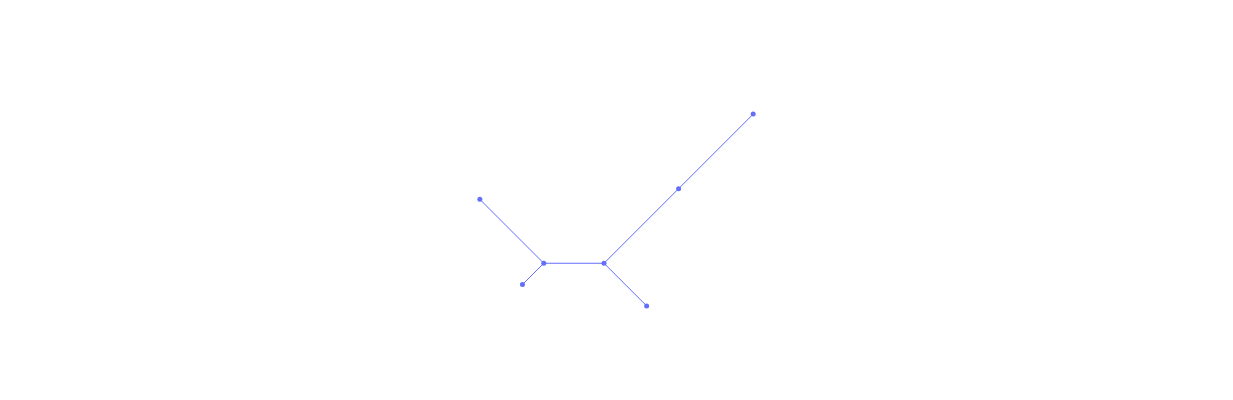

In [9]:
anjl.plot(Z1h, marker_size=5, internal_marker_size=5, width=400, height=400)

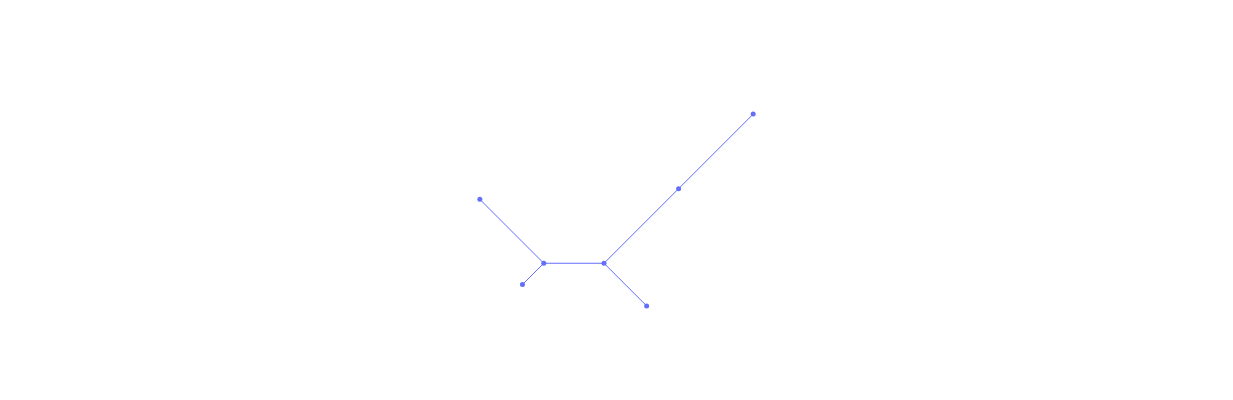

In [10]:
anjl.plot(Z1, marker_size=5, internal_marker_size=5, width=400, height=400)

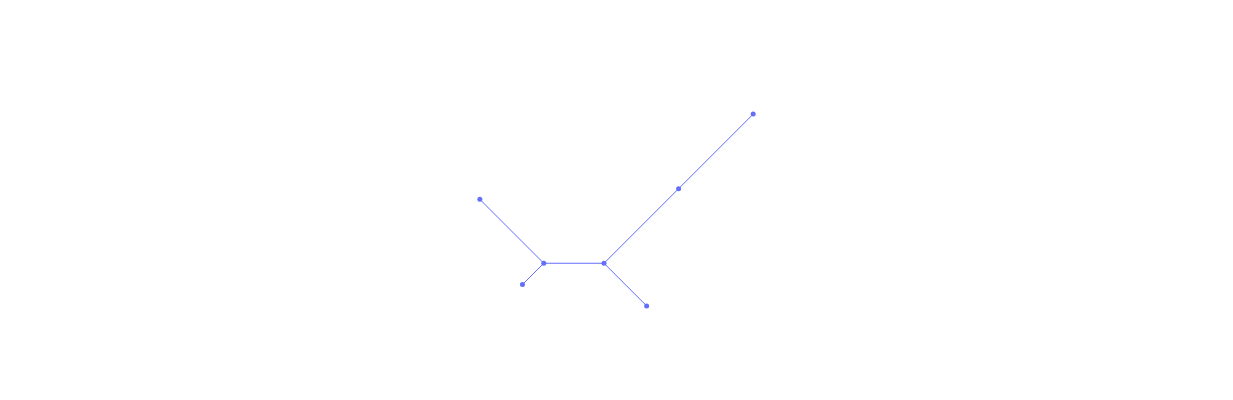

In [15]:
anjl.plot(Z1r, marker_size=5, internal_marker_size=5, width=400, height=400)

In [16]:
ld1 = pd.DataFrame.from_records(
    [
        ["A", "apple", "carrot", "pigeon", "Ferrari"],
        ["B", "apple", "pea", "ladybird", "Lamborghini"],
        ["C", "banana", "cabbage", "pigeon", "Landrover"],
        ["D", "mango", "cabbage", "spider", np.nan],
    ],
    columns=["name", "fruit", "vegetable", "animal", "car"],
)
ld1

,name,fruit,vegetable,animal,car
0,A,apple,carrot,pigeon,Ferrari
1,B,apple,pea,ladybird,Lamborghini
2,C,banana,cabbage,pigeon,Landrover
3,D,mango,cabbage,spider,NaN


In [17]:
anjl.map_internal_to_leaves(Z1)

[[0, 1], [2, 0, 1], [3, 2, 0, 1]]

In [18]:
anjl.paint_internal(Z1, ld1["fruit"].values)

array(['apple', '', ''], dtype=object)

In [19]:
anjl.paint_internal(Z1, ld1["car"].values)

array(['', '', ''], dtype=object)

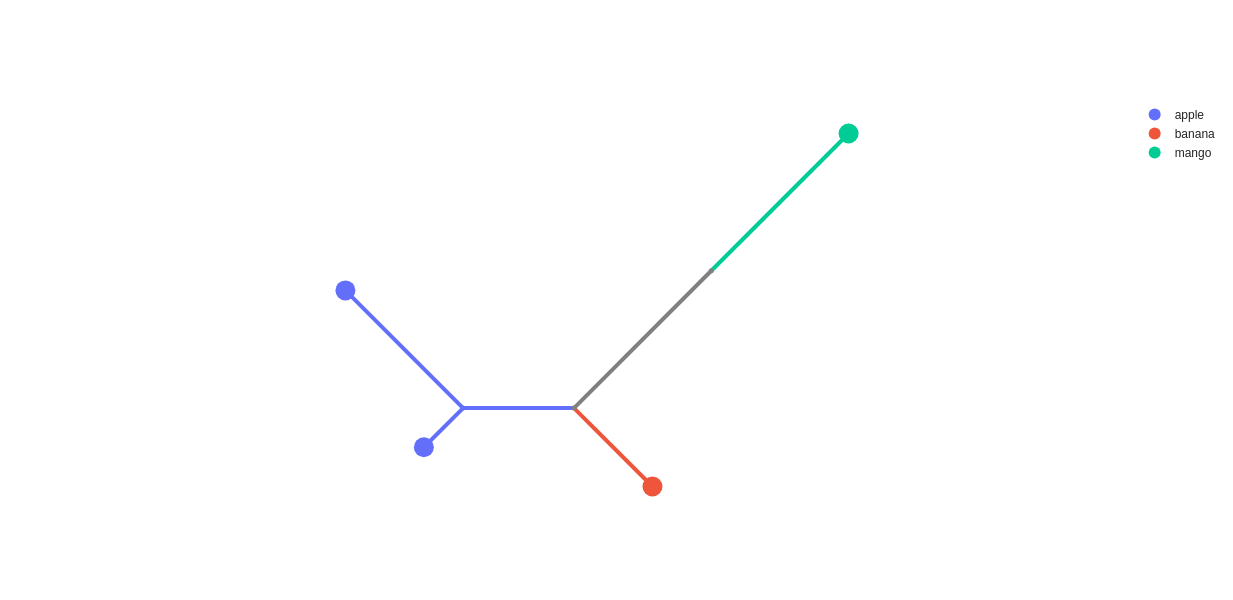

In [20]:
anjl.plot(
    Z=Z1,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="fruit",
    marker_size=20,
    internal_marker_size=5,
    line_width=4,
)

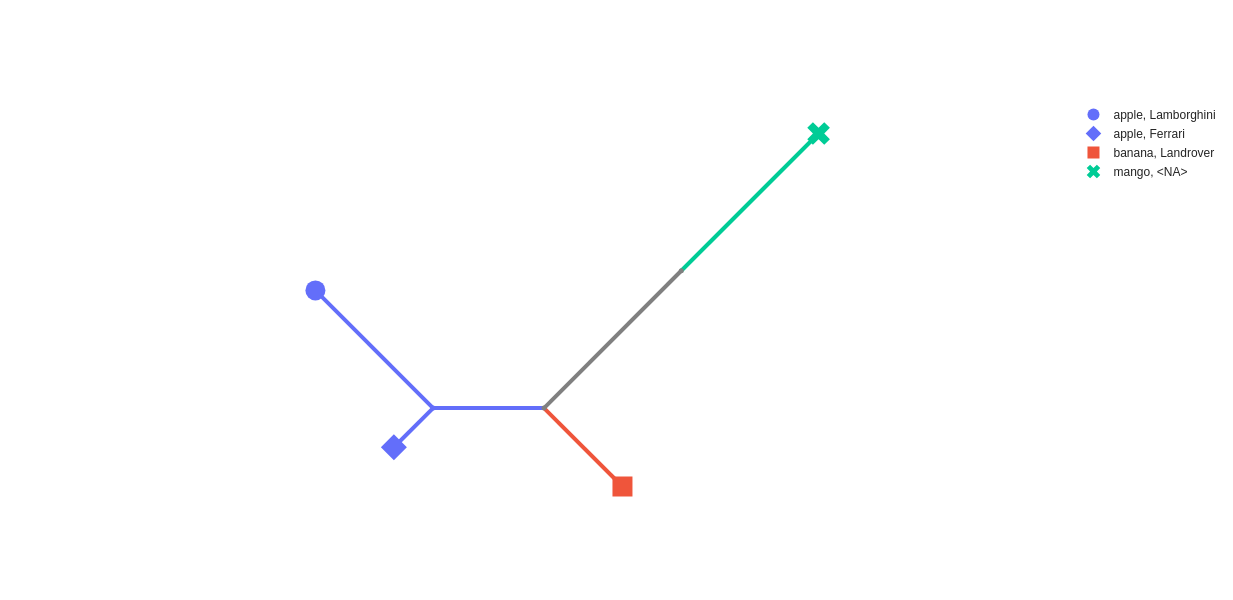

In [21]:
anjl.plot(
    Z=Z1r,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="fruit",
    marker_size=20,
    symbol="car",
    internal_marker_size=5,
    line_width=4,
)

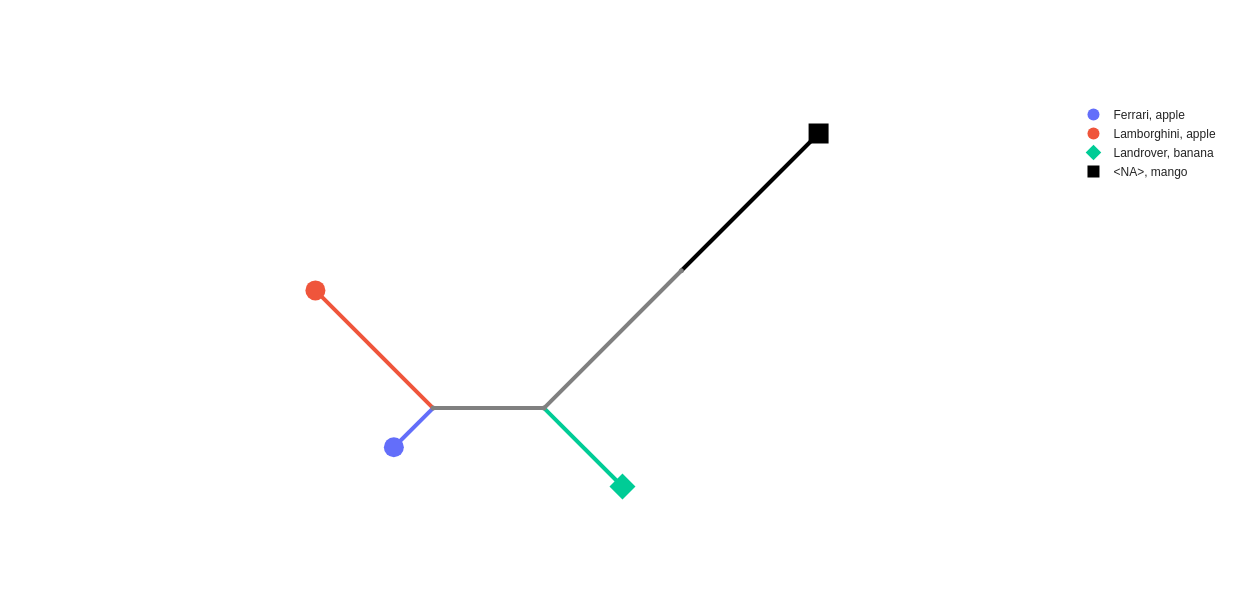

In [22]:
anjl.plot(
    Z=Z1r,
    leaf_data=ld1,
    hover_name="name",
    hover_data=["fruit", "vegetable", "animal", "car"],
    color="car",
    marker_size=20,
    symbol="fruit",
    internal_marker_size=5,
    line_width=4,
)

## Example 2

In [11]:
D2, _ = anjl.data.wikipedia_example()
Z2 = anjl.canonical_nj(D2)
Z2

array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [12]:
Z2h = anjl.heuristic_nj(D2)
Z2h

init
parent 5 x 0 y 1 z 0
init done
z 0
J [18446744073709551615                    0                    0
                    2                    3]

-------------------------------------------------------------------------------
iteration 1 z 0
begin search
z 0
J [18446744073709551615                    0                    0
                    2                    3]
First search the rows up to the new node z=0.
Second, fully search the row corresponding to the new node z=0.
i=0
Third, search all other rows after z=0.
i=1
i=2
Search 2 0
Previous best match still available at row i=2, col j=0.
Compare new node at row i=2, col z=0
Found new global minimum at i=2, j=0, q_ij=-28.0, d_ij=7.0.
i=3
Search 3 2
Previous best match still available at row i=3, col j=2.
Compare new node at row i=3, col z=0
i=4
Search 4 3
Previous best match still available at row i=4, col j=3.
Compare new node at row i=4, col z=0

-------------------------------------------------------------------------------


array([[0. , 1. , 2. , 3. , 2. ],
       [2. , 5. , 4. , 3. , 3. ],
       [3. , 6. , 2. , 2. , 4. ],
       [4. , 7. , 0.5, 0.5, 5. ]], dtype=float32)

In [13]:
print(anjl.to_string(Z2))

Node(id=8, dist=0, count=5)
    Leaf(id=4, dist=0.5)
    Node(id=7, dist=0.5, count=4)
        Leaf(id=3, dist=2.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)


In [14]:
print(anjl.to_string(Z2h))

Node(id=8, dist=0, count=5)
    Leaf(id=4, dist=0.5)
    Node(id=7, dist=0.5, count=4)
        Leaf(id=3, dist=2.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)


In [15]:
Z2r = anjl.rapid_nj(D2)
Z2r

array([[0., 1., 2., 3., 2.],
       [2., 5., 4., 3., 3.],
       [4., 6., 1., 2., 4.],
       [3., 7., 1., 1., 5.]], dtype=float32)

In [16]:
print(anjl.to_string(Z2r))

Node(id=8, dist=0, count=5)
    Leaf(id=3, dist=1.0)
    Node(id=7, dist=1.0, count=4)
        Leaf(id=4, dist=1.0)
        Node(id=6, dist=2.0, count=3)
            Leaf(id=2, dist=4.0)
            Node(id=5, dist=3.0, count=2)
                Leaf(id=0, dist=2.0)
                Leaf(id=1, dist=3.0)


In [ ]:
anjl.map_internal_to_leaves(Z2)

In [ ]:
anjl.map_internal_to_leaves(Z2r)

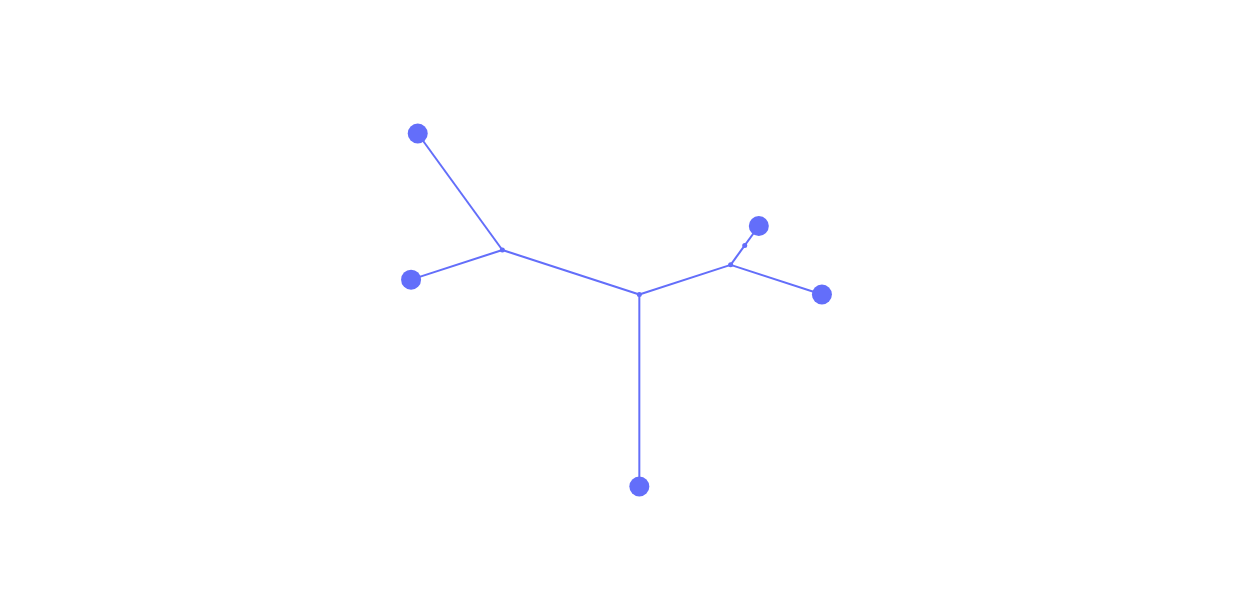

In [17]:
anjl.plot(Z=Z2, line_width=2, marker_size=20, internal_marker_size=5)

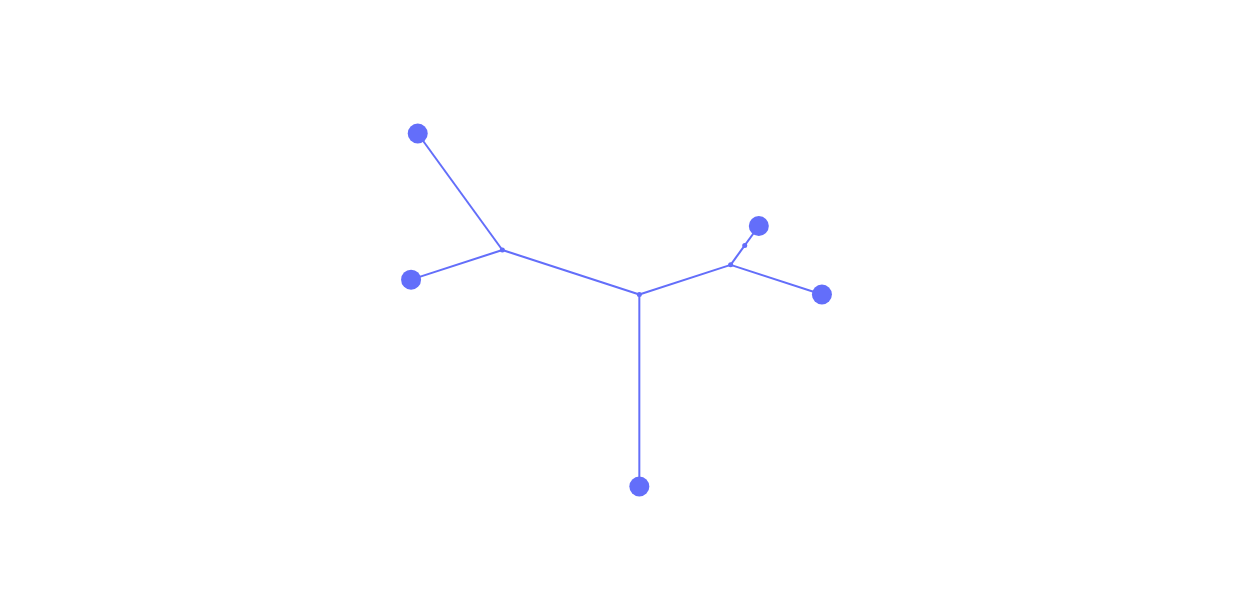

In [18]:
anjl.plot(Z=Z2h, line_width=2, marker_size=20, internal_marker_size=5)

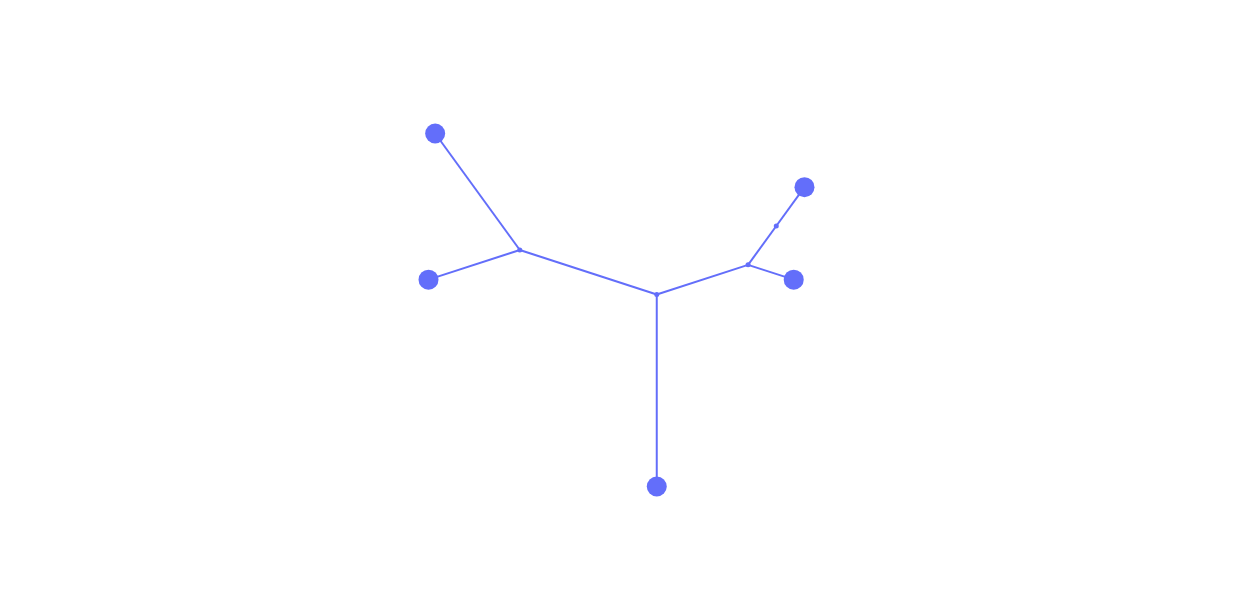

In [19]:
anjl.plot(Z=Z2r, line_width=2, marker_size=20, internal_marker_size=5)

## Example 3 (small)

In [ ]:
ld3 = pd.read_csv("../benchmark/small/samples.csv")
ld3.head()

In [ ]:
small = zarr.load("../benchmark/small/dist.zarr.zip")
D3 = squareform(small)
D3.shape

In [ ]:
Z3 = anjl.canonical_nj(D3)

In [ ]:
Z3r = anjl.rapid_nj(D3)

In [ ]:
anjl.plot(
    Z3,
    line_width=1,
    marker_size=8,
    count_sort=True,
    color="taxon",
    hover_name="sample_id",
    leaf_data=ld3,
)

In [ ]:
anjl.plot(
    Z3r,
    line_width=1,
    marker_size=8,
    count_sort=True,
    color="taxon",
    hover_name="sample_id",
    leaf_data=ld3,
)

## Example 4 (medium)

In [ ]:
ld4 = pd.read_csv("../benchmark/medium/samples.csv")
ld4.head()

In [ ]:
medium = zarr.load("../benchmark/medium/dist.zarr.zip")
D4 = squareform(medium)
D4.shape

In [ ]:
Z4 = anjl.canonical_nj(D4)
Z4

In [ ]:
Z4r = anjl.rapid_nj(D4)
Z4r

In [ ]:
anjl.plot(
    Z4,
    line_width=0.5,
    marker_size=5,
    width=800,
    height=700,
    leaf_data=ld4,
    color="taxon",
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
)

In [ ]:
anjl.plot(
    Z4r,
    line_width=0.5,
    marker_size=5,
    width=800,
    height=700,
    leaf_data=ld4,
    color="taxon",
    hover_name="sample_id",
    hover_data=["country", "location", "year", "month"],
)